In [1]:
from sys import path
path.append('./../spineSimulator/')
import plot
from importlib import reload
reload(plot)

<module 'plot' from '/home/work/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/plot.py'>

In [2]:
import dbm.dumb as dbm
import numpy as np
import matplotlib.pyplot as plt

from constants import parameter_sets

# Check conservation of total charge

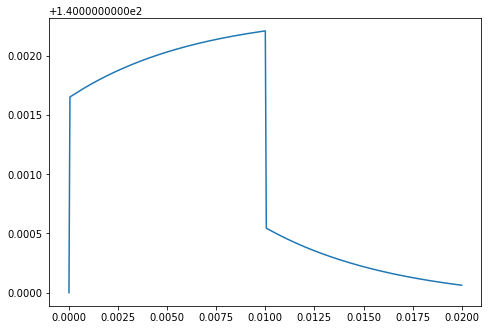

In [3]:
reload(plot)
fig = plt.figure()
pos = [0,0,1,1]
plot.ax_electroneutrality_head(fig, pos, 'experiment_1')

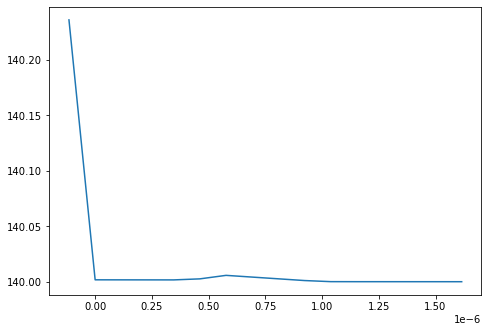

In [4]:
reload(plot)
fig = plt.figure()
pos = [0,0,1,1]
plot.ax_electroneutrality_main_axis(fig, pos, 'experiment_1', 1)


# Load Results

In [70]:
reload(plot)
file_name = 'experiment_4'
results = plot.load_results(file_name)
x = results['x']
t = results['t']
a = results['a']
phi = results['phi']
c_Na = results['c_Na']
c_K = results['c_K']
c_Cl = results['c_Cl']

# param_set = results['parameters'] TODO
param_set = 'equal_diffusion'
params = parameter_sets[param_set]

dx = x[1] - x[0]
dt = t[1] - t[0]

#####################################
r_Na = plot.compute_resistivity(c_Na, params, 'Na')
R_Na = plot.compute_resistance(r_Na, a, dx)
g_Na_ij = plot.compute_conductivity(r_Na, a, dx)

r_K = plot.compute_resistivity(c_K, params, 'K')
R_K = plot.compute_resistance(r_K, a, dx)
g_K_ij = plot.compute_conductivity(r_K, a, dx)

r_Cl = plot.compute_resistivity(c_Cl, params, 'Cl')
R_Cl = plot.compute_resistance(r_Cl, a, dx)
g_Cl_ij = plot.compute_conductivity(r_Cl, a, dx)

r_e = 1./ ( 1./r_Na + 1./r_K + 1./r_Cl )
R_e = plot.compute_resistance(r_e, a, dx)
g_ij = plot.compute_conductivity(r_e, a, dx)

i_c_Na = plot.compute_chemical_current(c_Na, a, dx, params, 'Na')
i_c_K = plot.compute_chemical_current(c_K, a, dx, params, 'K')
i_c_Cl = plot.compute_chemical_current(c_Cl, a, dx, params, 'Cl')

i_e_Na = plot.compute_electrical_current(g_Na_ij, phi)
i_e_K = plot.compute_electrical_current(g_K_ij, phi)
i_e_Cl = plot.compute_electrical_current(g_Cl_ij, phi)

# chemical potentials
mu_Na = plot.compute_chemical_potential(c_Na, params)
mu_K = plot.compute_chemical_potential(c_K, params)
mu_Cl = plot.compute_chemical_potential(c_Cl, params)

i_e = i_e_Na + i_e_K + i_e_Cl

i_c = i_c_Na + i_c_K + i_c_Cl

i_total = i_e + i_c

a

array([2.50e-07, 2.50e-07, 2.50e-07, 2.50e-07, 2.50e-07, 1.50e-07,
       5.00e-08, 5.00e-08, 5.00e-08, 5.00e-08, 2.25e-07, 4.00e-07,
       4.00e-07, 4.00e-07, 4.00e-07, 4.00e-07])

# Cumulative resistance

In [71]:

cum_R = np.cumsum(1./g_ij, axis=1)
cum_R2 = np.cumsum(R_e, axis=1)


import copy
i = copy.copy(i_e)
i[:,0] = i[:,1]
cum_R3 = np.cumsum(-(phi[:,1:]-phi[:,:-1])/ i, axis=1)

/tmp/ipykernel_5868/2752959418.py:8: RuntimeWarning: invalid value encountered in true_divide
  cum_R3 = np.cumsum(-(phi[:,1:]-phi[:,:-1])/ i, axis=1)


/tmp/ipykernel_5868/2025308840.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([tick / 1.e6 for tick in ax.get_yticks()])


[]

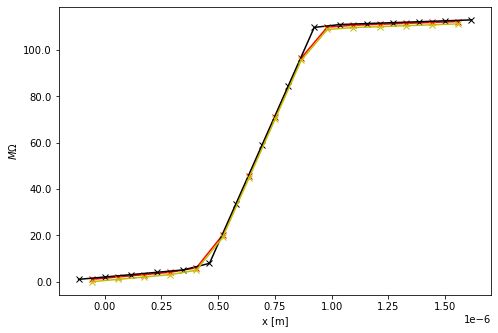

In [72]:
t_i= 1
fig = plt.figure()
pos = [0,0,1,1]

def ax_cumulative_resistance(fig, pos):
    ax = fig.add_axes(pos)
    ax.plot((x[1:]+x[:-1])/2.,cum_R[t_i, :],'rx-')
    ax.plot(x,cum_R2[t_i, :],'kx-')
    ax.plot((x[1:]+x[:-1])/2.,cum_R3[t_i, :],'yx-')
    ax.set_xlabel('x [m]')
    #print(ax.get_yticks())
    ax.set_yticklabels([tick / 1.e6 for tick in ax.get_yticks()])
    ax.set_ylabel(r'$M\Omega$')
    #ax.legend()
    
ax_cumulative_resistance(fig, pos)
plt.plot()

In [73]:
40.e-12*300e6*1000 # mV

11.999999999999998

# Current along main axis

/tmp/ipykernel_5868/2231195019.py:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx-" (-> color='r'). The keyword argument will take precedence.
  ax3.plot((i_c_Cl+i_e_Cl)[t_i], 'rx-', c='orange', label='chloride')


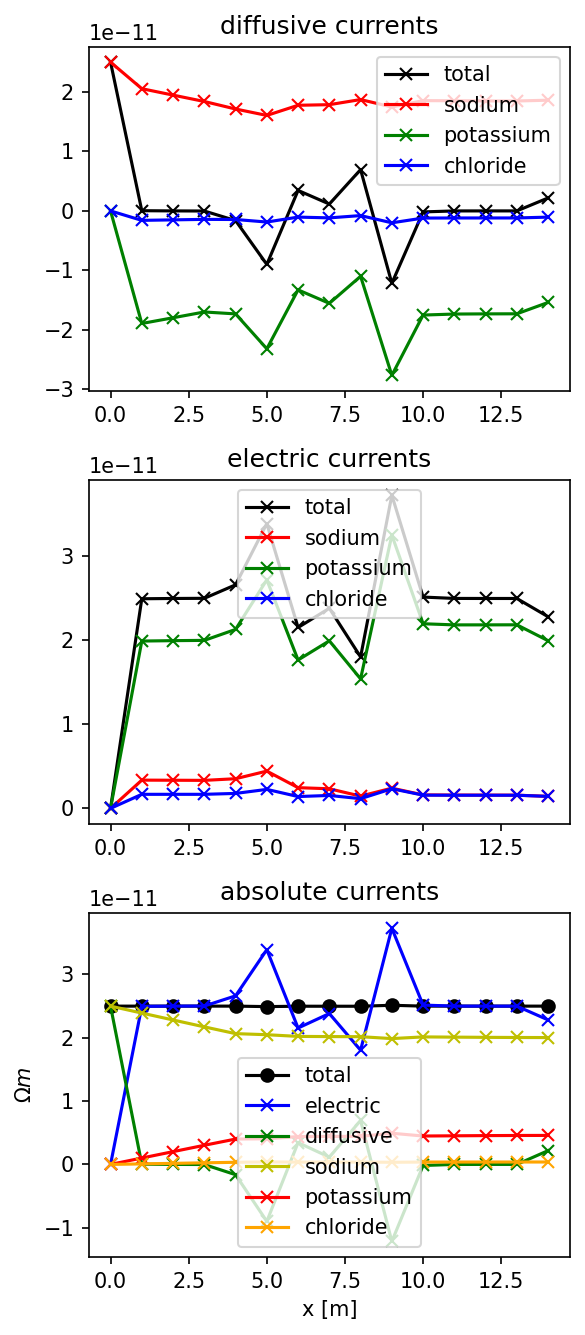

In [75]:
t_i = 190

#plt.plot(np.cumsum(R_Na[1:-1]))
fig = plt.figure(figsize=(4,9), dpi=150)

ax1 = fig.add_subplot(311)
ax1.plot(i_c[t_i], 'kx-', label='total')
ax1.plot(i_c_Na[t_i], 'rx-', label='sodium')
ax1.plot(i_c_K[t_i], 'gx-', label='potassium')
ax1.plot(i_c_Cl[t_i], 'bx-', label='chloride')

ax1.legend()
ax1.set_title('diffusive currents')

ax2 = fig.add_subplot(312)

ax2.set_title('electric currents')

ax2.plot(i_e[t_i], 'kx-', label='total')
ax2.plot(i_e_Na[t_i], 'rx-', label='sodium')
ax2.plot(i_e_K[t_i], 'gx-', label='potassium')
ax2.plot(i_e_Cl[t_i], 'bx-', label='chloride')
ax2.legend()

ax2.set_title('electric currents')

ax3 = fig.add_subplot(313)
ax3.plot(i_total[t_i], 'ko-', label='total')
ax3.plot(i_e[t_i], 'bx-', label='electric')
ax3.plot(i_c[t_i], 'gx-', label='diffusive')
ax3.plot((i_c_Na+i_e_Na)[t_i], 'yx-', label='sodium')
ax3.plot((i_c_K+i_e_K)[t_i], 'rx-', label='potassium')
ax3.plot((i_c_Cl+i_e_Cl)[t_i], 'rx-', c='orange', label='chloride')

ax3.set_title('absolute currents')
ax3.set_xlabel('x [m]')
ax3.set_ylabel(r'$\Omega m$')
ax3.legend()

plt.tight_layout()
plt.show()


# Current through neck vs. time

/tmp/ipykernel_5868/2660964322.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax3.plot((i_c_Cl+i_e_Cl)[:, 7], 'r-', c='orange', label='chloride')


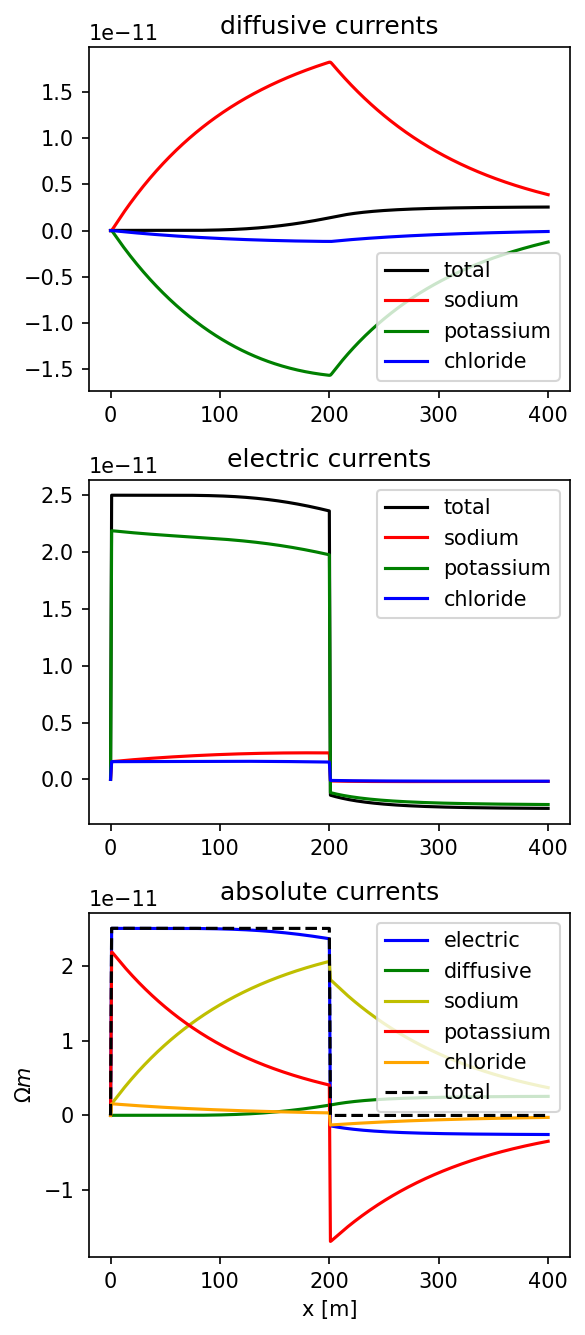

In [76]:
x_i = 7

#plt.plot(np.cumsum(R_Na[1:-1]))
fig = plt.figure(figsize=(4,9), dpi=150)

ax1 = fig.add_subplot(311)
ax1.plot(i_c[:, 7], 'k-', label='total')
ax1.plot(i_c_Na[:, 7], 'r-', label='sodium')
ax1.plot(i_c_K[:, 7], 'g-', label='potassium')
ax1.plot(i_c_Cl[:, 7], 'b-', label='chloride')

ax1.legend()
ax1.set_title('diffusive currents')

ax2 = fig.add_subplot(312)

ax2.set_title('electric currents')

ax2.plot(i_e[:, 7], 'k-', label='total')
ax2.plot(i_e_Na[:, 7], 'r-', label='sodium')
ax2.plot(i_e_K[:, 7], 'g-', label='potassium')
ax2.plot(i_e_Cl[:, 7], 'b-', label='chloride')
ax2.legend()

ax2.set_title('electric currents')

ax3 = fig.add_subplot(313)
ax3.plot(i_e[:, 7], 'b-', label='electric')
ax3.plot(i_c[:, 7], 'g-', label='diffusive')
ax3.plot((i_c_Na+i_e_Na)[:, 7], 'y-', label='sodium')
ax3.plot((i_c_K+i_e_K)[:, 7], 'r-', label='potassium')
ax3.plot((i_c_Cl+i_e_Cl)[:, 7], 'r-', c='orange', label='chloride')
ax3.plot(i_total[:, 7], 'k--', label='total')


ax3.set_title('absolute currents')
ax3.set_xlabel('x [m]')
ax3.set_ylabel(r'$\Omega m$')
ax3.legend()

plt.tight_layout()
plt.show()

# Charge

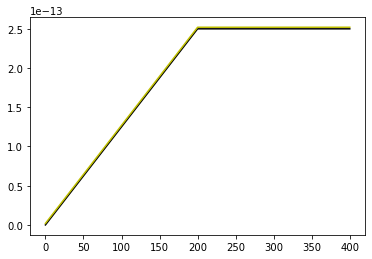

In [77]:
syn_current = i_total[:,0]
syn_charge = np.cumsum(syn_current * dt)
neck_curret = i_total[:,7]
neck_charge = np.cumsum(neck_curret * dt)
plt.plot(neck_charge, 'k-')
plt.plot(syn_charge, 'y-')
plt.show()

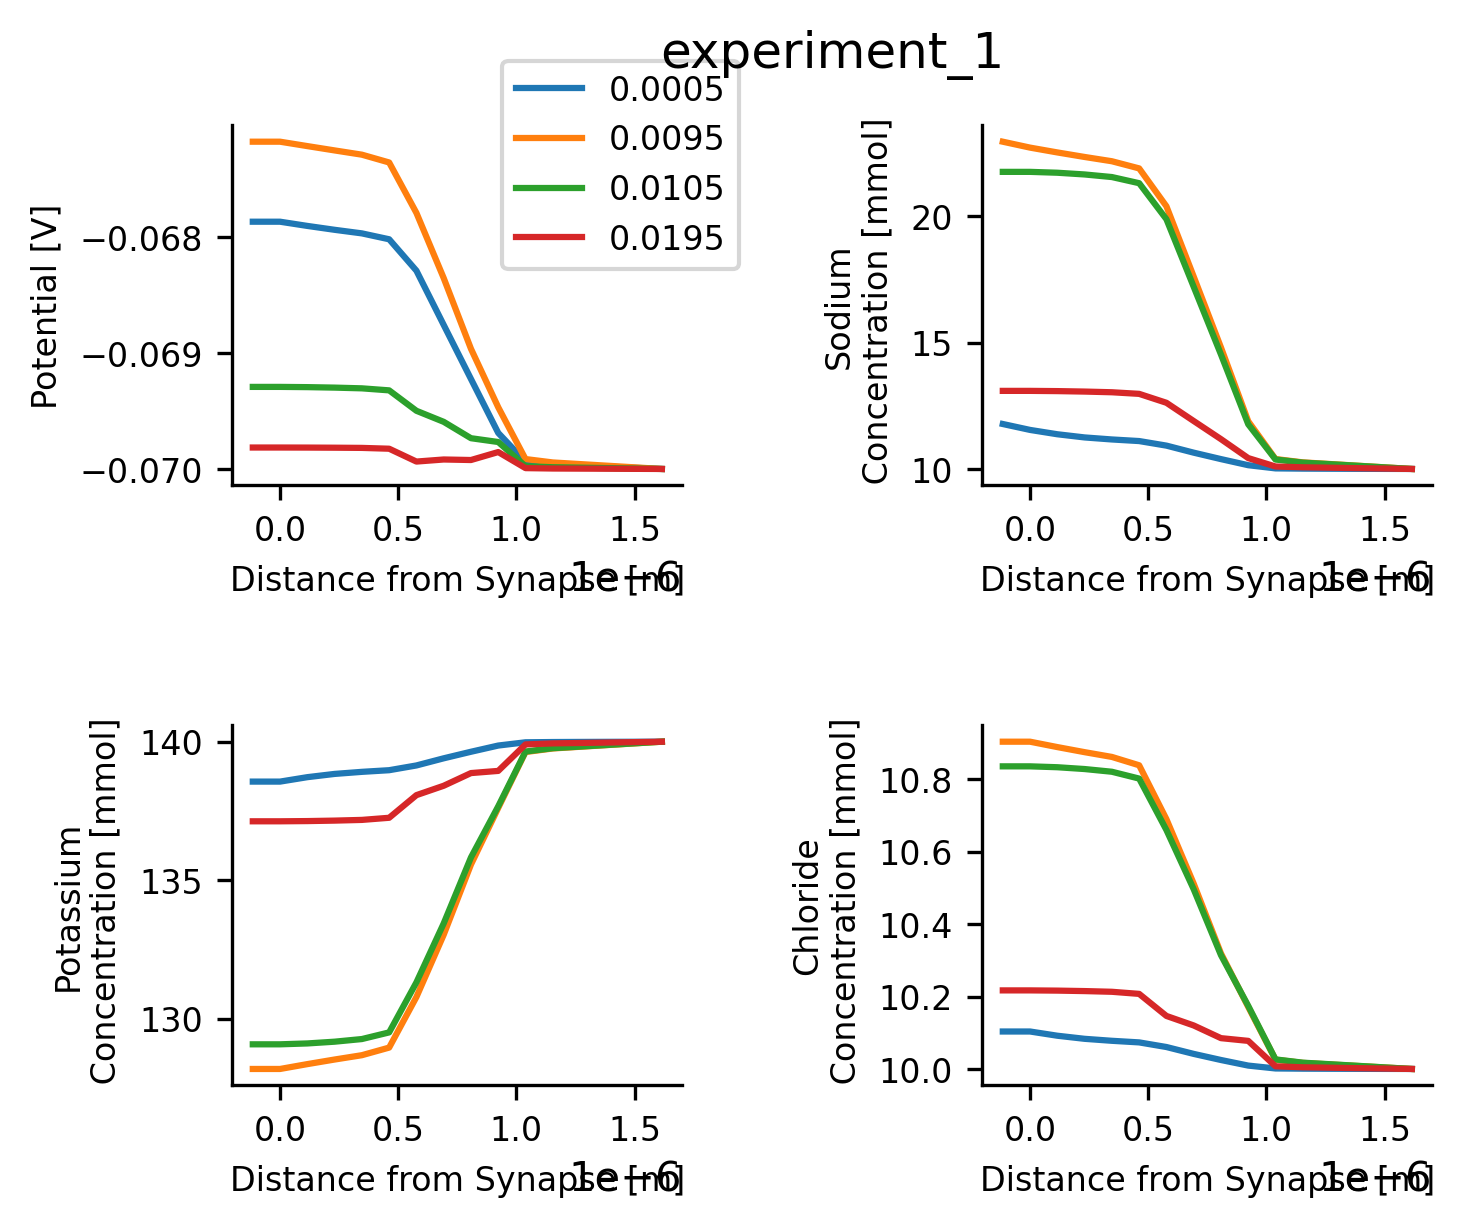

In [78]:
plot.figure_main_axes_overview('experiment_1')

# Effect of Diffusion Constants for ions

(401, 16)


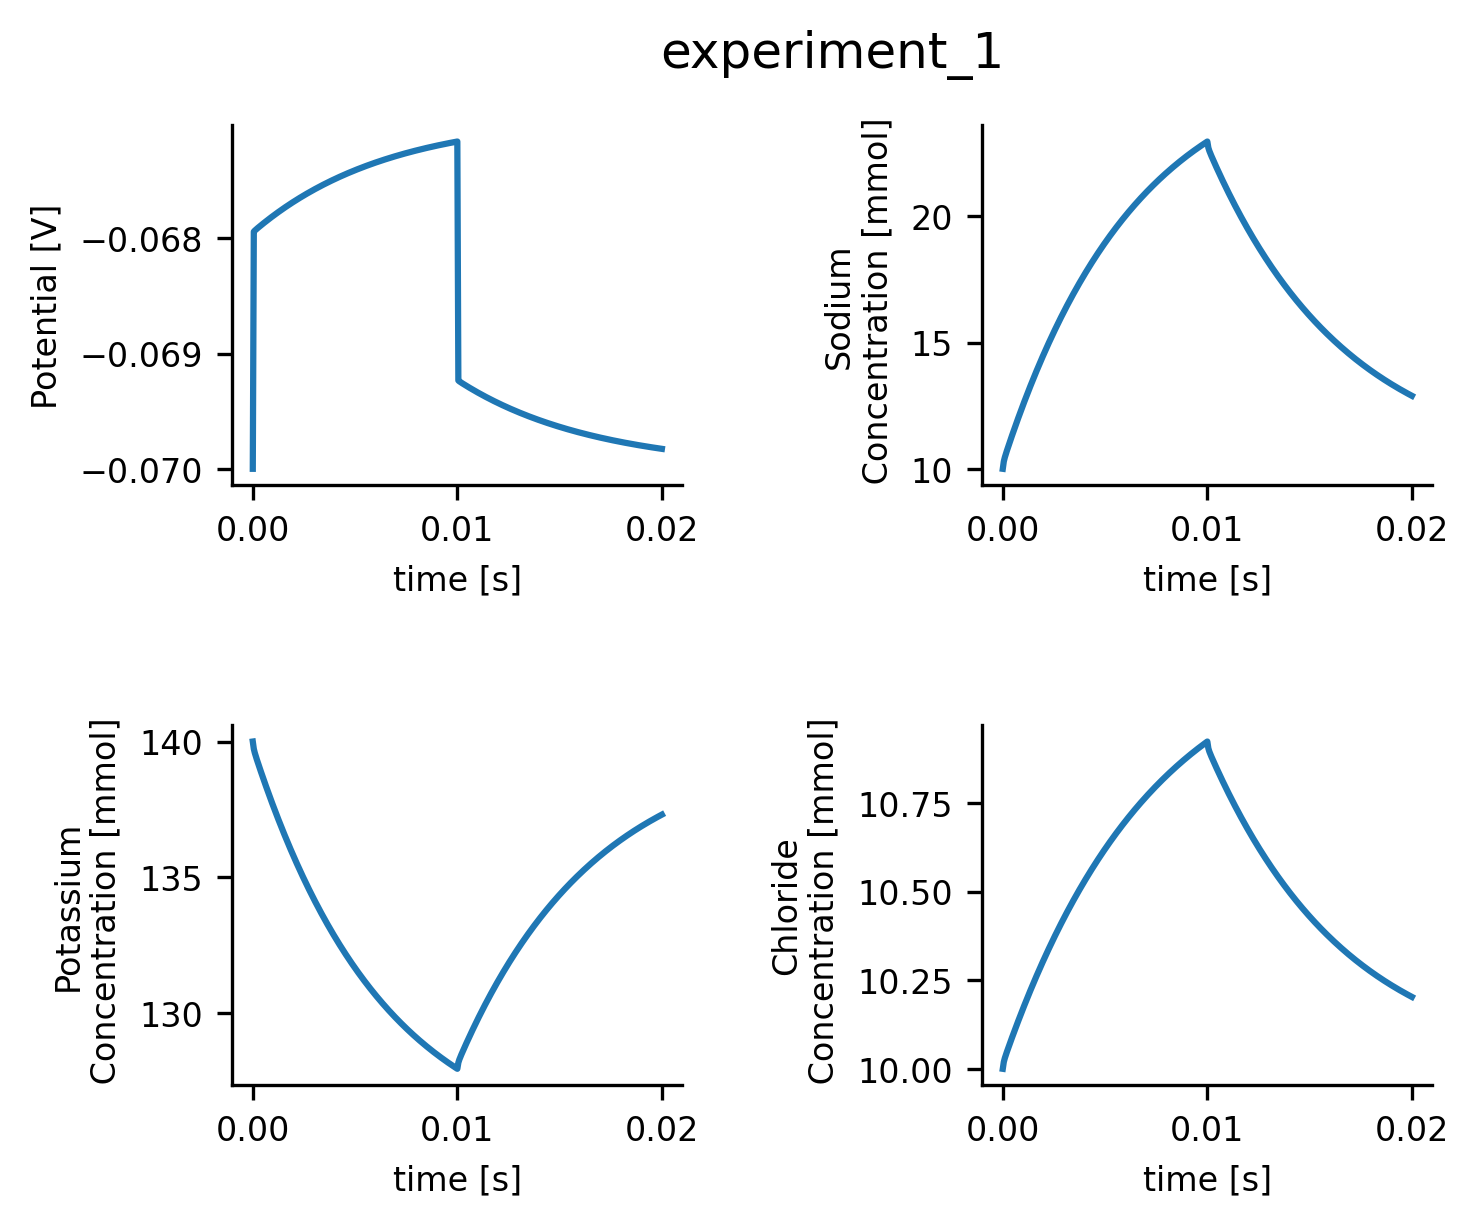

(401, 16)


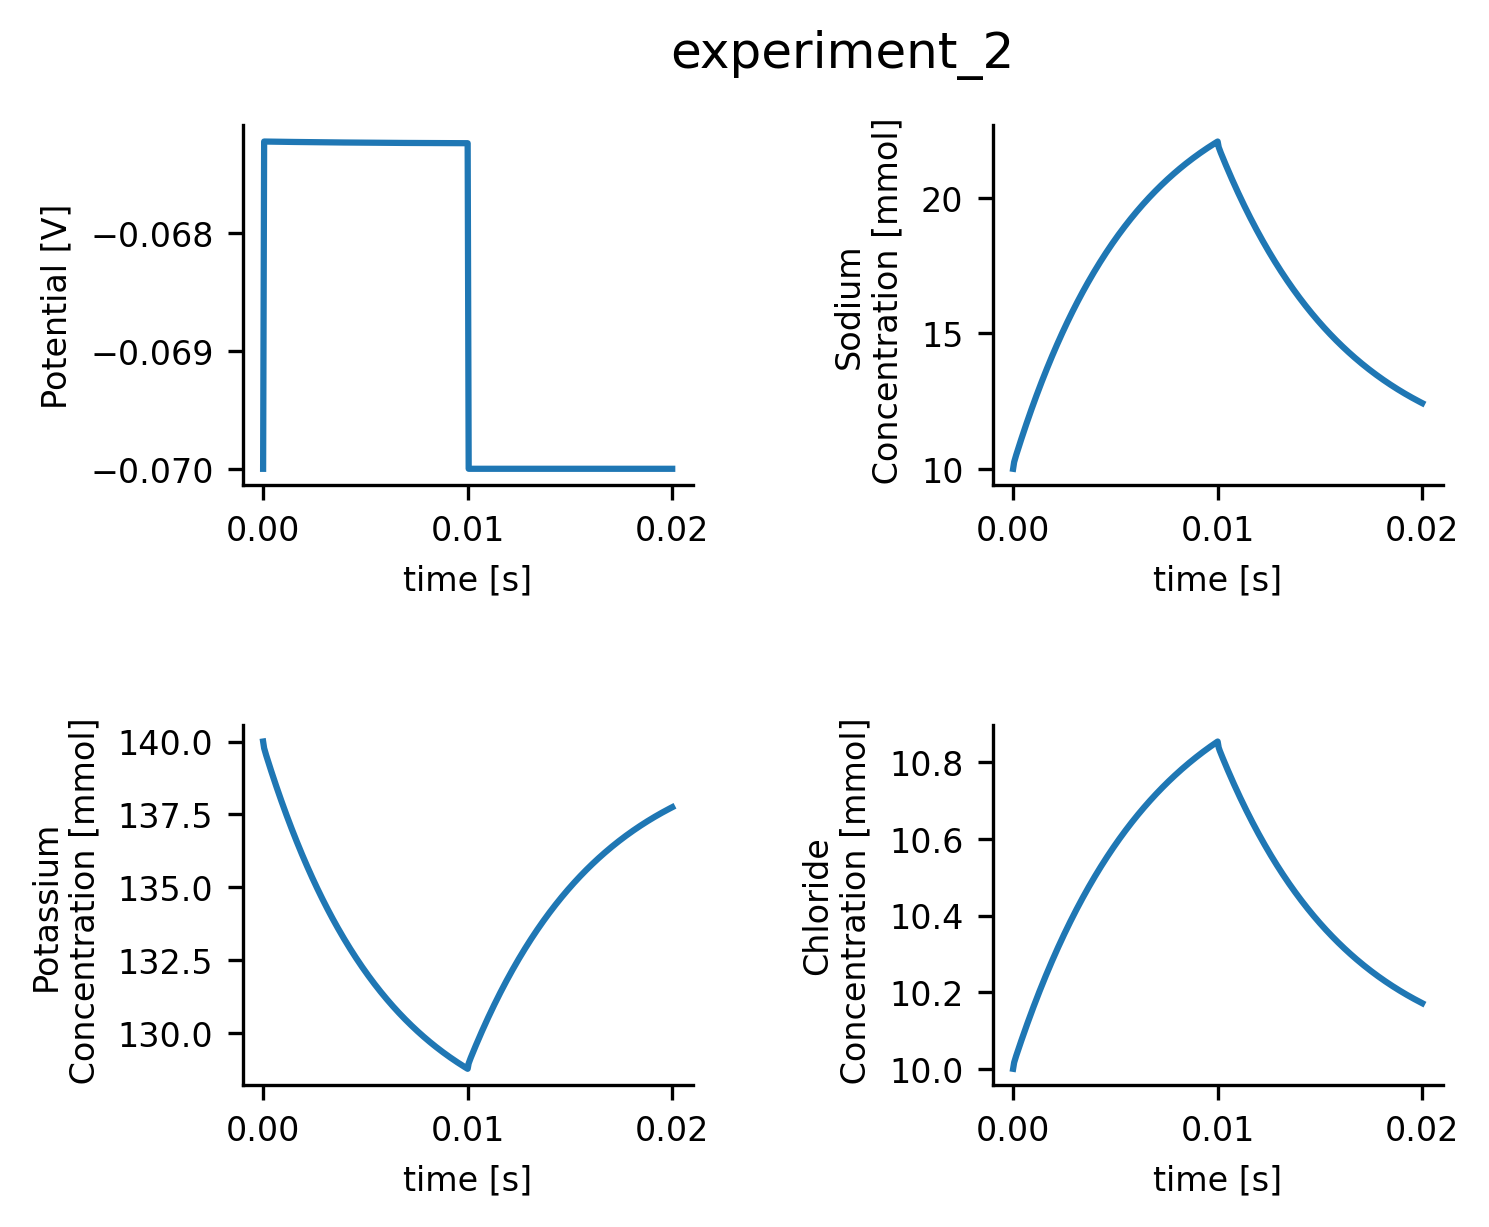

(401, 16)


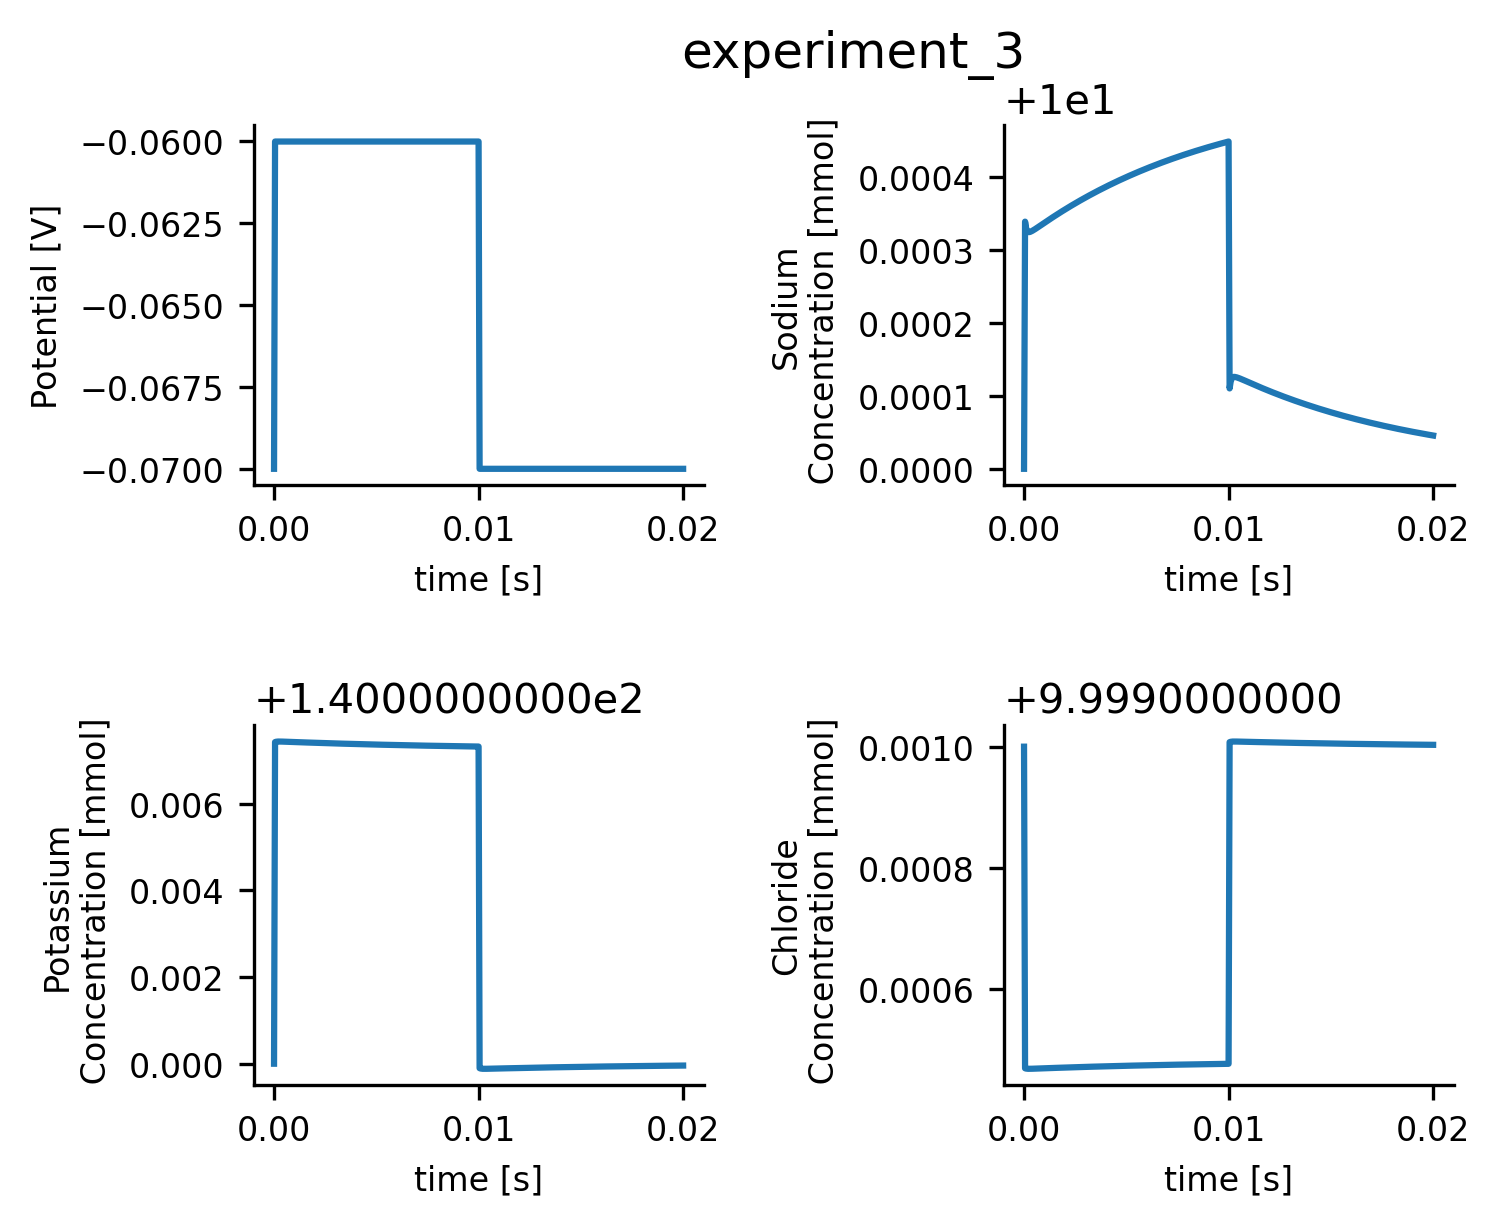

(401, 16)


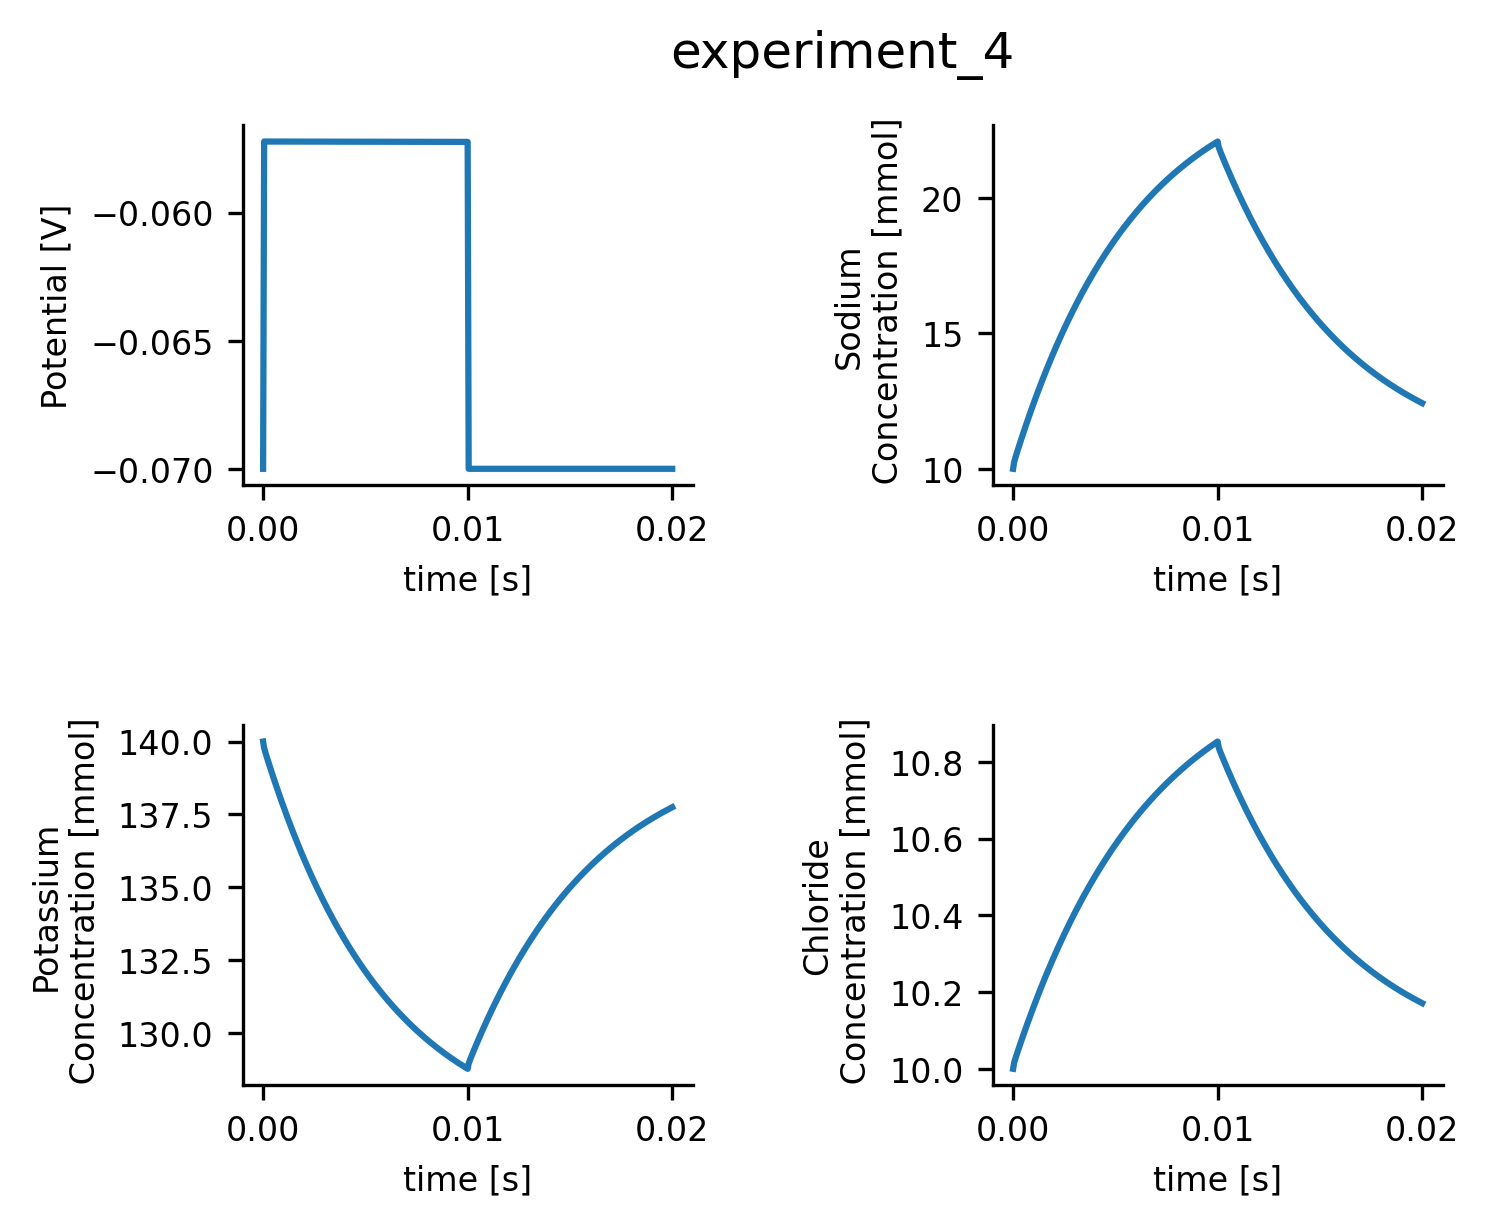

(401, 16)


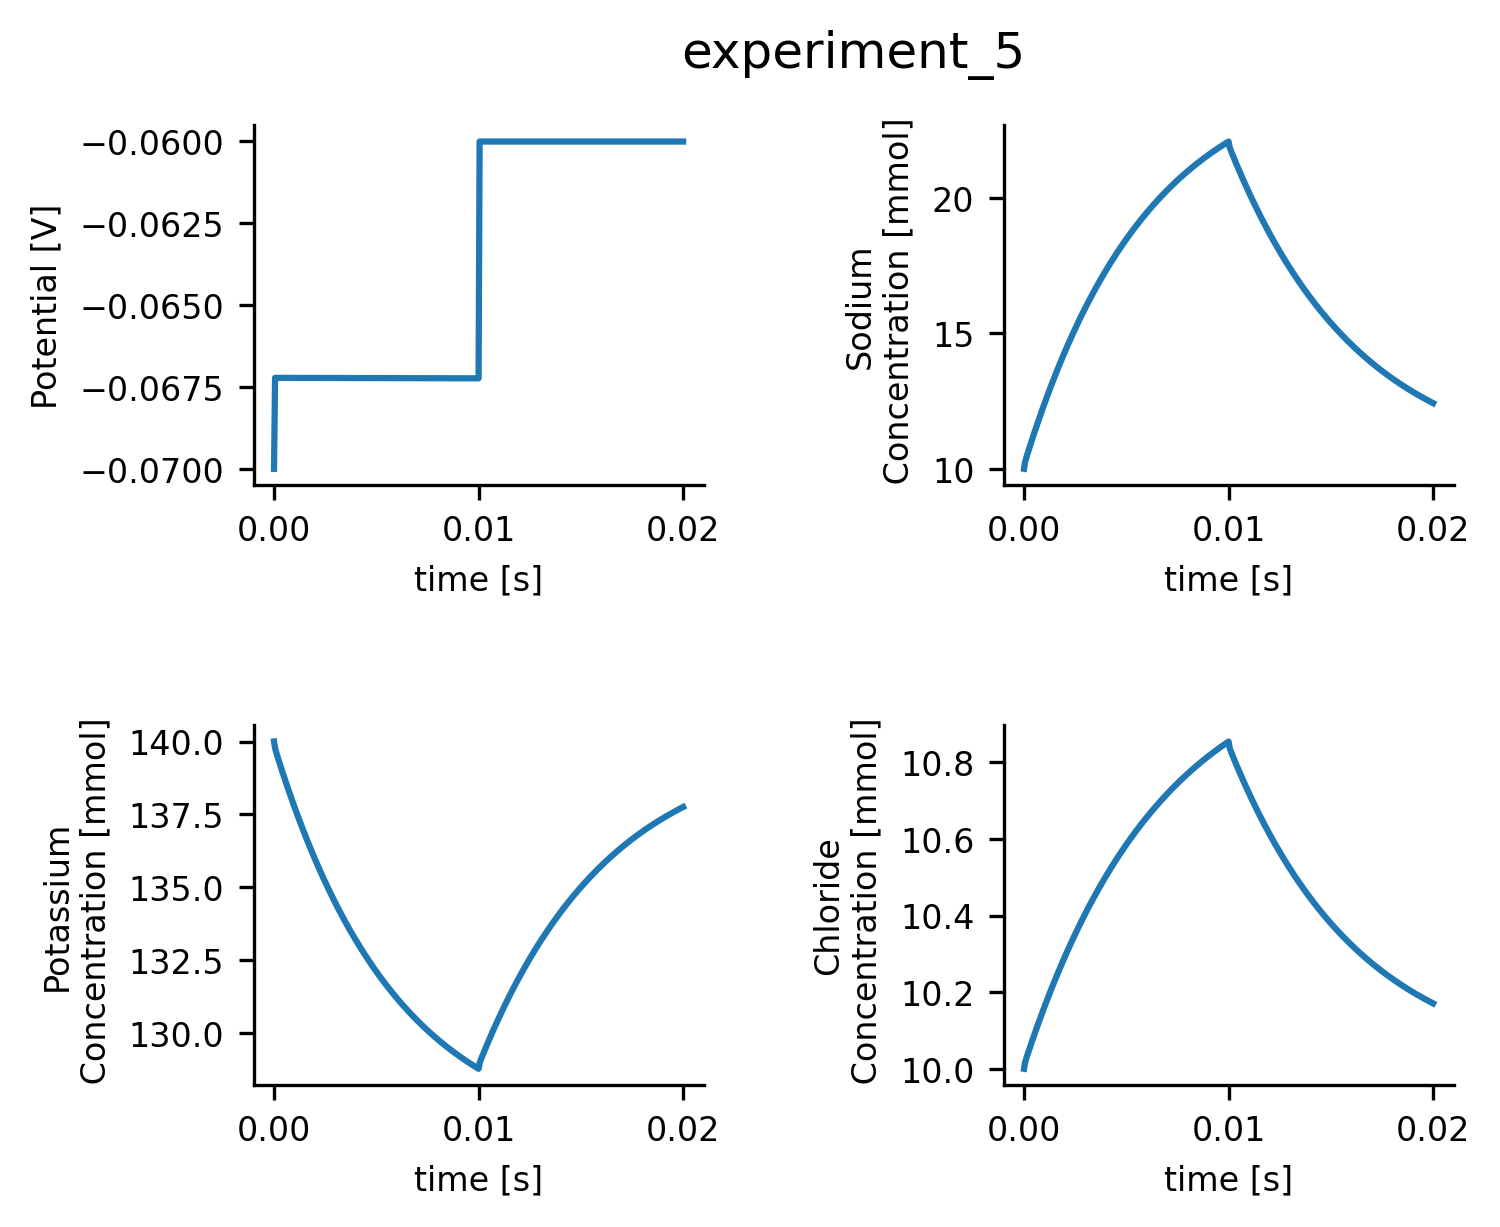

(401, 16)


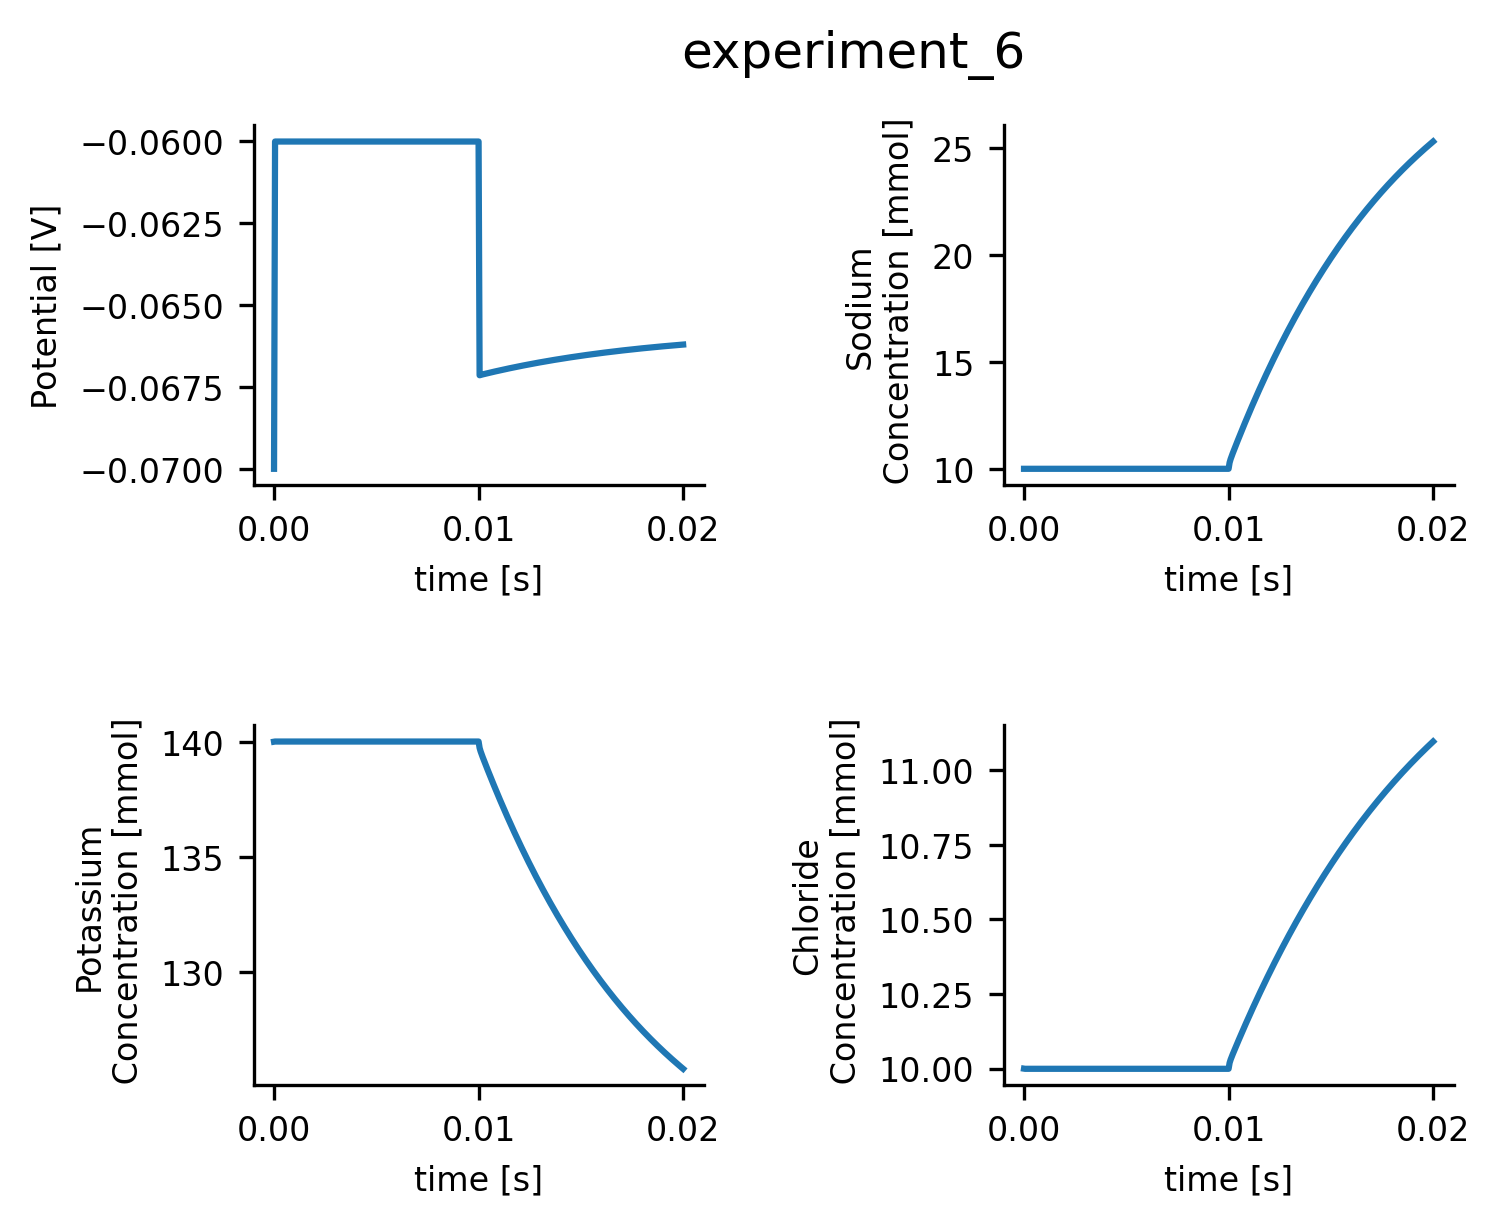

(401, 16)


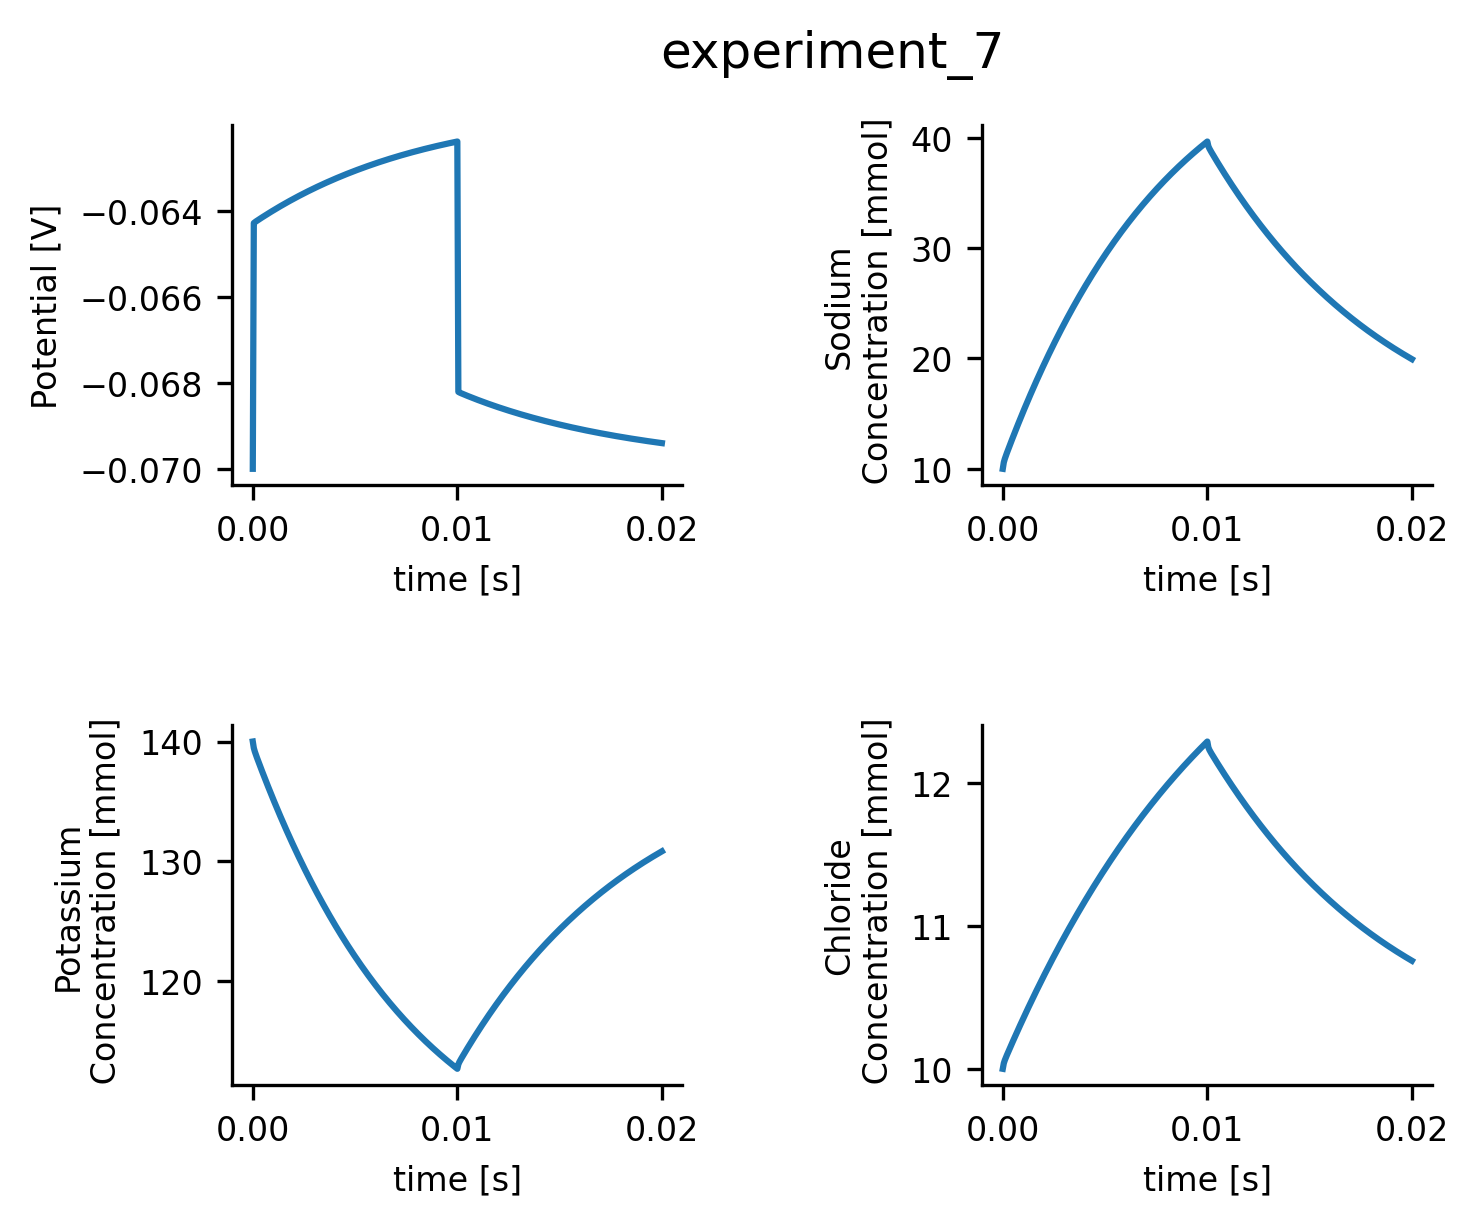

In [16]:
for i in range(1,8):
    plot.figure_head_overview('experiment_'+str(i))


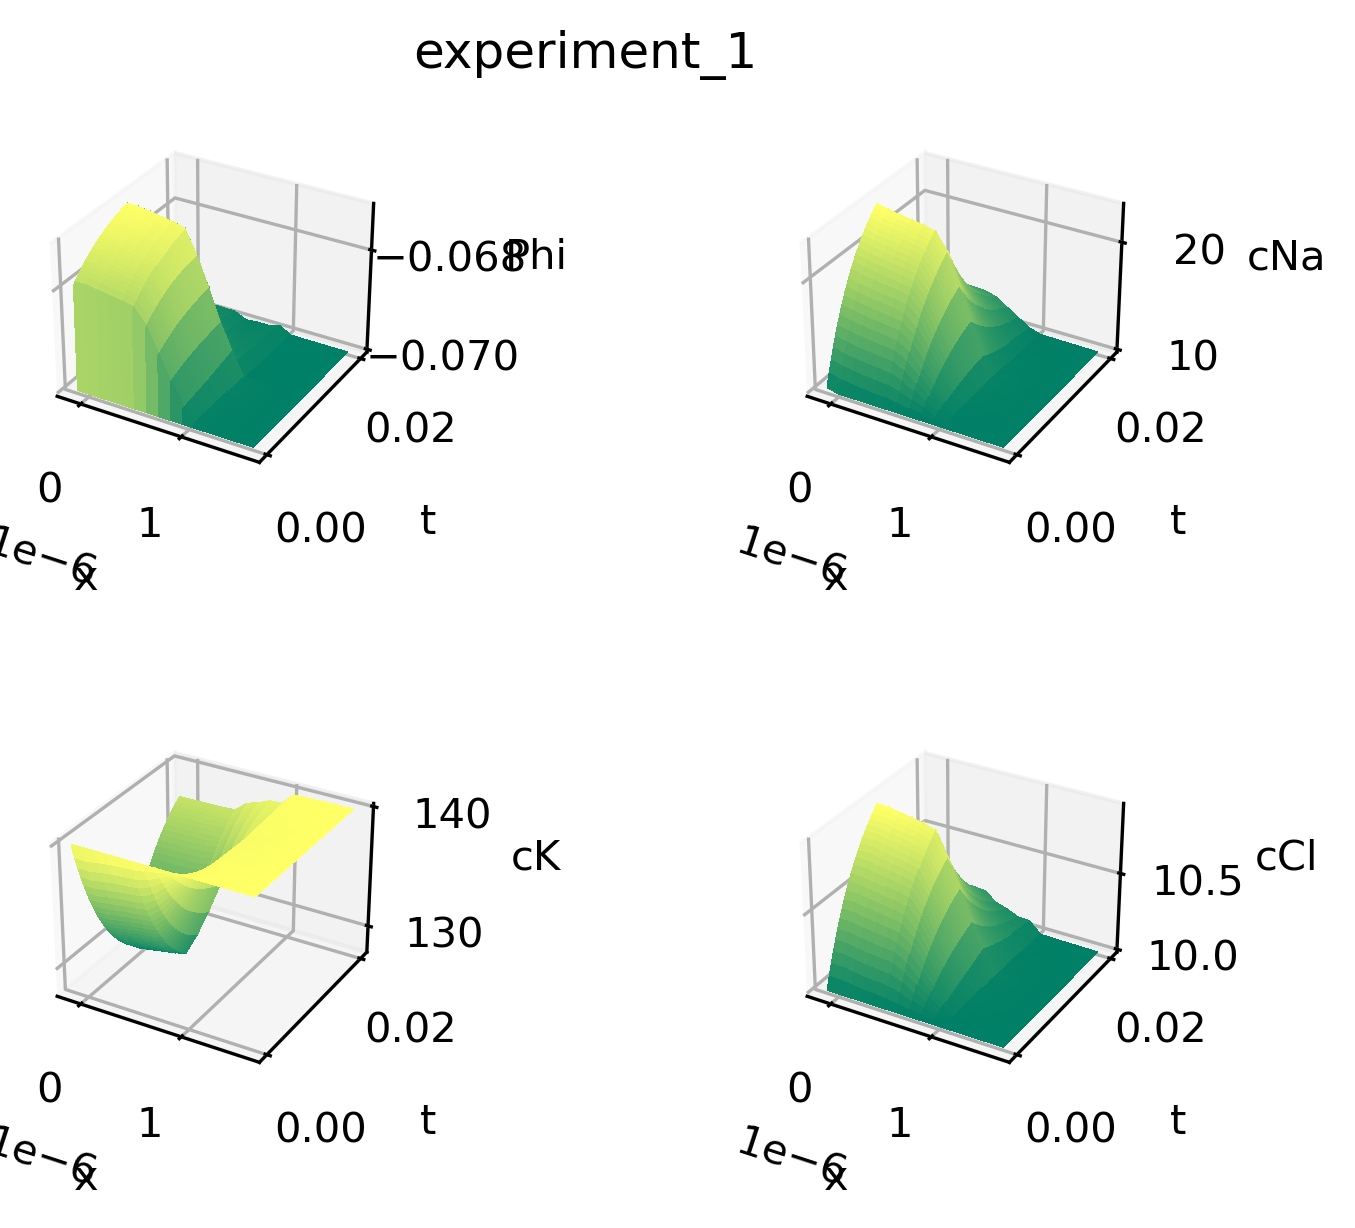

In [17]:
reload(plot)
plot.figure_space_time_summary('experiment_1')

Spines can decouple electrical and chemical compartmentalization. Membrane voltage increases when input is active and drops immediately when input is shutdown again. Concentration changes last longer and do not affect the membrane potential because Na+ and K+ currents through neck compensate.

# How strong can concentrations change for different parameters?


# What is the effect of different diffusion constants for Na+ and K+?

## RESULTS
- Dendritic depolarisations fully invade spine without changing ion-concentrations.
- Input current to spines boosts depolarisation during bAPs
- Sodium concentration gradient get significantly reduced during elongated or repeatedly depolarisation
- changes of sodium concentraitions is limited (if driving force is concentration dependent)
- asymmetric diffusion between Na and K cause depolaristaion due to diffusion. (maybe this adds to bAP depol?)
- Dendritic depolarization and EPSP add up linearly

## Discussion
Case 1: EPSP first and then BAP
Glutamate opens AMPA ion-channels. EPSP depolarizes spine head at full EPSP size. This will alter sodium concentraion but also unblock NMDA and allow Ca2+ influx. Then the BAP follows and will fully depolarize the spine head because it does not depend on concentration changes. This will again open NMDA and allow Ca2+ influx. Input currents will further depolarize spine head.

Case 2: BAP first and then EPSP
BAP enters spine head and opens voltage gated sodium channels. Sodium influx increases sodium concentration. However synaptic conductance is reduced because there is no glutamate. EPSP follows but is reduced in size because of alterd sodium concentration intracellular and extracellular (reduced driving force for sodium ions). This will reduce Ca2+ influx.

This is not likely because during bAPs spine depol was similar to dendrite depol, which means that there was no or weak membrane current in spine head (Cornejo2022voltage)
